Manuel Salomón Zevallos Falla, Matrikelnummer 281153

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapely.geometry
import shapely.wkt
import geopandas as gpd
import rasterio
from rasterio.plot import show
import rasterstats

Question 1: Below, you are provided with a list of polygon coordinates representing different regions. Your task is to create a GeoDataFrame using the given polygon coordinates. Additionally, define a function named calculate_perimeter that takes the GeoDataFrame as input. This function should calculate the perimeters of the polygons and return a dictionary where the region IDs are the keys and the corresponding perimeters are the values.

Utilize the methods and techniques taught in our lectures to transform the columns of the GeoDataFrame, making them suitable for dictionary creation within your function definition. Iterating over the elements of the columns, applying at least two different methods to achieve the desired transformation.

In [181]:
#polygon geometries
polygon_coords = [
    [(0, 0), (0, 5), (1, 1), (1, 0)],  # Polygon 1 coordinates
    [(2, 2), (2, 3), (3, 3), (3, 2)],  # Polygon 2 coordinates
]

In [182]:
coordinates = [(0, 0), (0, 5), (1, 1), (1, 0)]
pol1 = shapely.geometry.Polygon(coordinates)

In [183]:
coordinates = [(2, 2), (2, 3), (3, 3), (3, 2)]
pol2 = shapely.geometry.Polygon(coordinates)

In [184]:
gs = gpd.GeoSeries([pol, pol2], crs=4326)
gs

0    MULTIPOLYGON (((0.00000 0.00000, 0.00000 -2.00...
1    POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3....
dtype: geometry

In [185]:
gd = {'id': ['x', 'y'], 'geometry': gs}
gd

{'id': ['x', 'y'],
 'geometry': 0    MULTIPOLYGON (((0.00000 0.00000, 0.00000 -2.00...
 1    POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3....
 dtype: geometry}

In [186]:
gd_df = gpd.GeoDataFrame(gd)
gd_df

,id,geometry
0,x,"MULTIPOLYGON (((0.00000 0.00000, 0.00000 -2.00..."
1,y,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."


In [187]:
gdf = gpd.GeoDataFrame({'id': ['x', 'y'], 'geometry': [pol, pol2]}, crs=4326)
gdf

,id,geometry
0,x,"MULTIPOLYGON (((0.00000 0.00000, 0.00000 -2.00..."
1,y,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."


In [188]:
def calculate_perimeter(gdf):
    perimeters = {}
    for idx, row in gdf.iterrows():
        region_id = idx + 1  
        perimeter = row['geometry'].length
        perimeters[region_id] = perimeter
    return perimeters

In [189]:
perimeter_dict = calculate_perimeter(gdf)

In [190]:
print(perimeter_dict)

{1: 28.0, 2: 4.0}


Question2: You are provided with a relief map file and a coastline shapefile. Write a Python program that reads and displays the relief map. Next, overlay the coastline on top of the relief map, adding titles, labels, and a legend. Finally, calculate and print the length of the largest coastline found in the shapefile, storing the corresponding coastline geometry in a new variable.

In [191]:
islands = gpd.read_file('ne_50m_coastline.shp', encoding='utf-8')
rel = rasterio.open('SR_50M.tif', 'r')

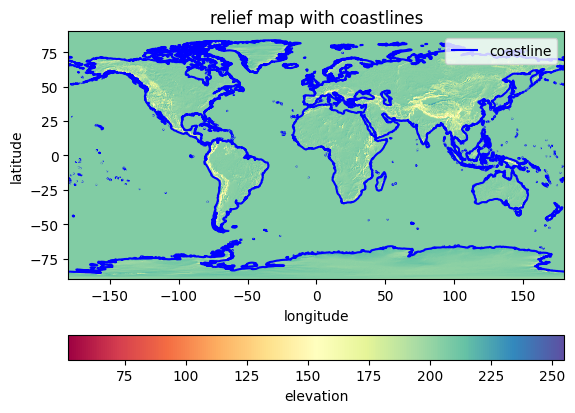

In [192]:
fig, ax = plt.subplots()
rel_new = ax.imshow(rel.read(1, masked=True), cmap='Spectral')
islands.plot(ax=ax,color='blue')
ax.set_title('relief map with coastlines')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
show(rel, ax=ax, cmap='Spectral');
cbar = fig.colorbar(rel_new, ax=ax, orientation='horizontal')
cbar.set_label('elevation')
ax.legend(['coastline'])

In [193]:
islands = islands.to_crs('EPSG:3857') 

In [194]:
largest_length = 0.0
largest_coastline = None

for index, row in islands.iterrows():
    coastline = row['geometry']
    length = coastline.length
    
    if length > largest_length:
        largest_length = length
        largest_coastline = coastline

print("Length of the largest coastline:", largest_length)

Length of the largest coastline: 223952139.0512938


In [195]:
largest_length

223952139.0512938

andere einfache Lösung:

In [196]:
max_length = max(islands.length)
max_length

223952139.0512938

In [197]:
print("Length of the largest coastline:", max_length)

Length of the largest coastline: 223952139.0512938


Question3: You are given a MultiPolygon object named pol, which consists of multiple polygons. Calculate the length and area of the second polygon within the MultiPolygon. Write a Python function called calculate_length_area that takes pol as input and returns a tuple containing the length and area of the second polygon. Call the function and output the results.

In [198]:
# MultiPolygon object pol
pol = shapely.wkt.loads('MULTIPOLYGON (((0 0, 0 -2, 10 -2, 10 0, 0 0)), ((0 0, 0 1, 1 1, 1 0, 0 0)))')

In [199]:
pol.geoms[1].length

4.0

In [200]:
pol.geoms[1].area

1.0

In [201]:
def calculate_length_area(pol):
    length = ()
    area = ()
    length = pol.geoms[1].length
    area = pol.geoms[1].area 
    return length, area

In [202]:
length, area = calculate_length_area(pol)
print("Length of the second polygon:", length)
print("Area of the second polygon:", area)

Length of the second polygon: 4.0
Area of the second polygon: 1.0


In [203]:
length, area #als Tupel ausgeben

(4.0, 1.0)

##The data used in this test has been sourced from https://www.naturalearthdata.com

Manuel Salomón Zevallos Falla, Matrikelnummer 281153